In [378]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


---

In [379]:
DIR_NUMBER = 121

## localhost:50003

In [380]:
BROKER_PORT = 50003
LOG_PATH = "C:\\Users\\SJSJ\\Desktop\\wowsan\\log\\tickLogger\\" +str(DIR_NUMBER) + "\\" + str(BROKER_PORT) + "_tick.json"

### Time vs Performance Metrics

In [381]:
# 데이터 로드
df = pd.read_json(LOG_PATH, lines=True)

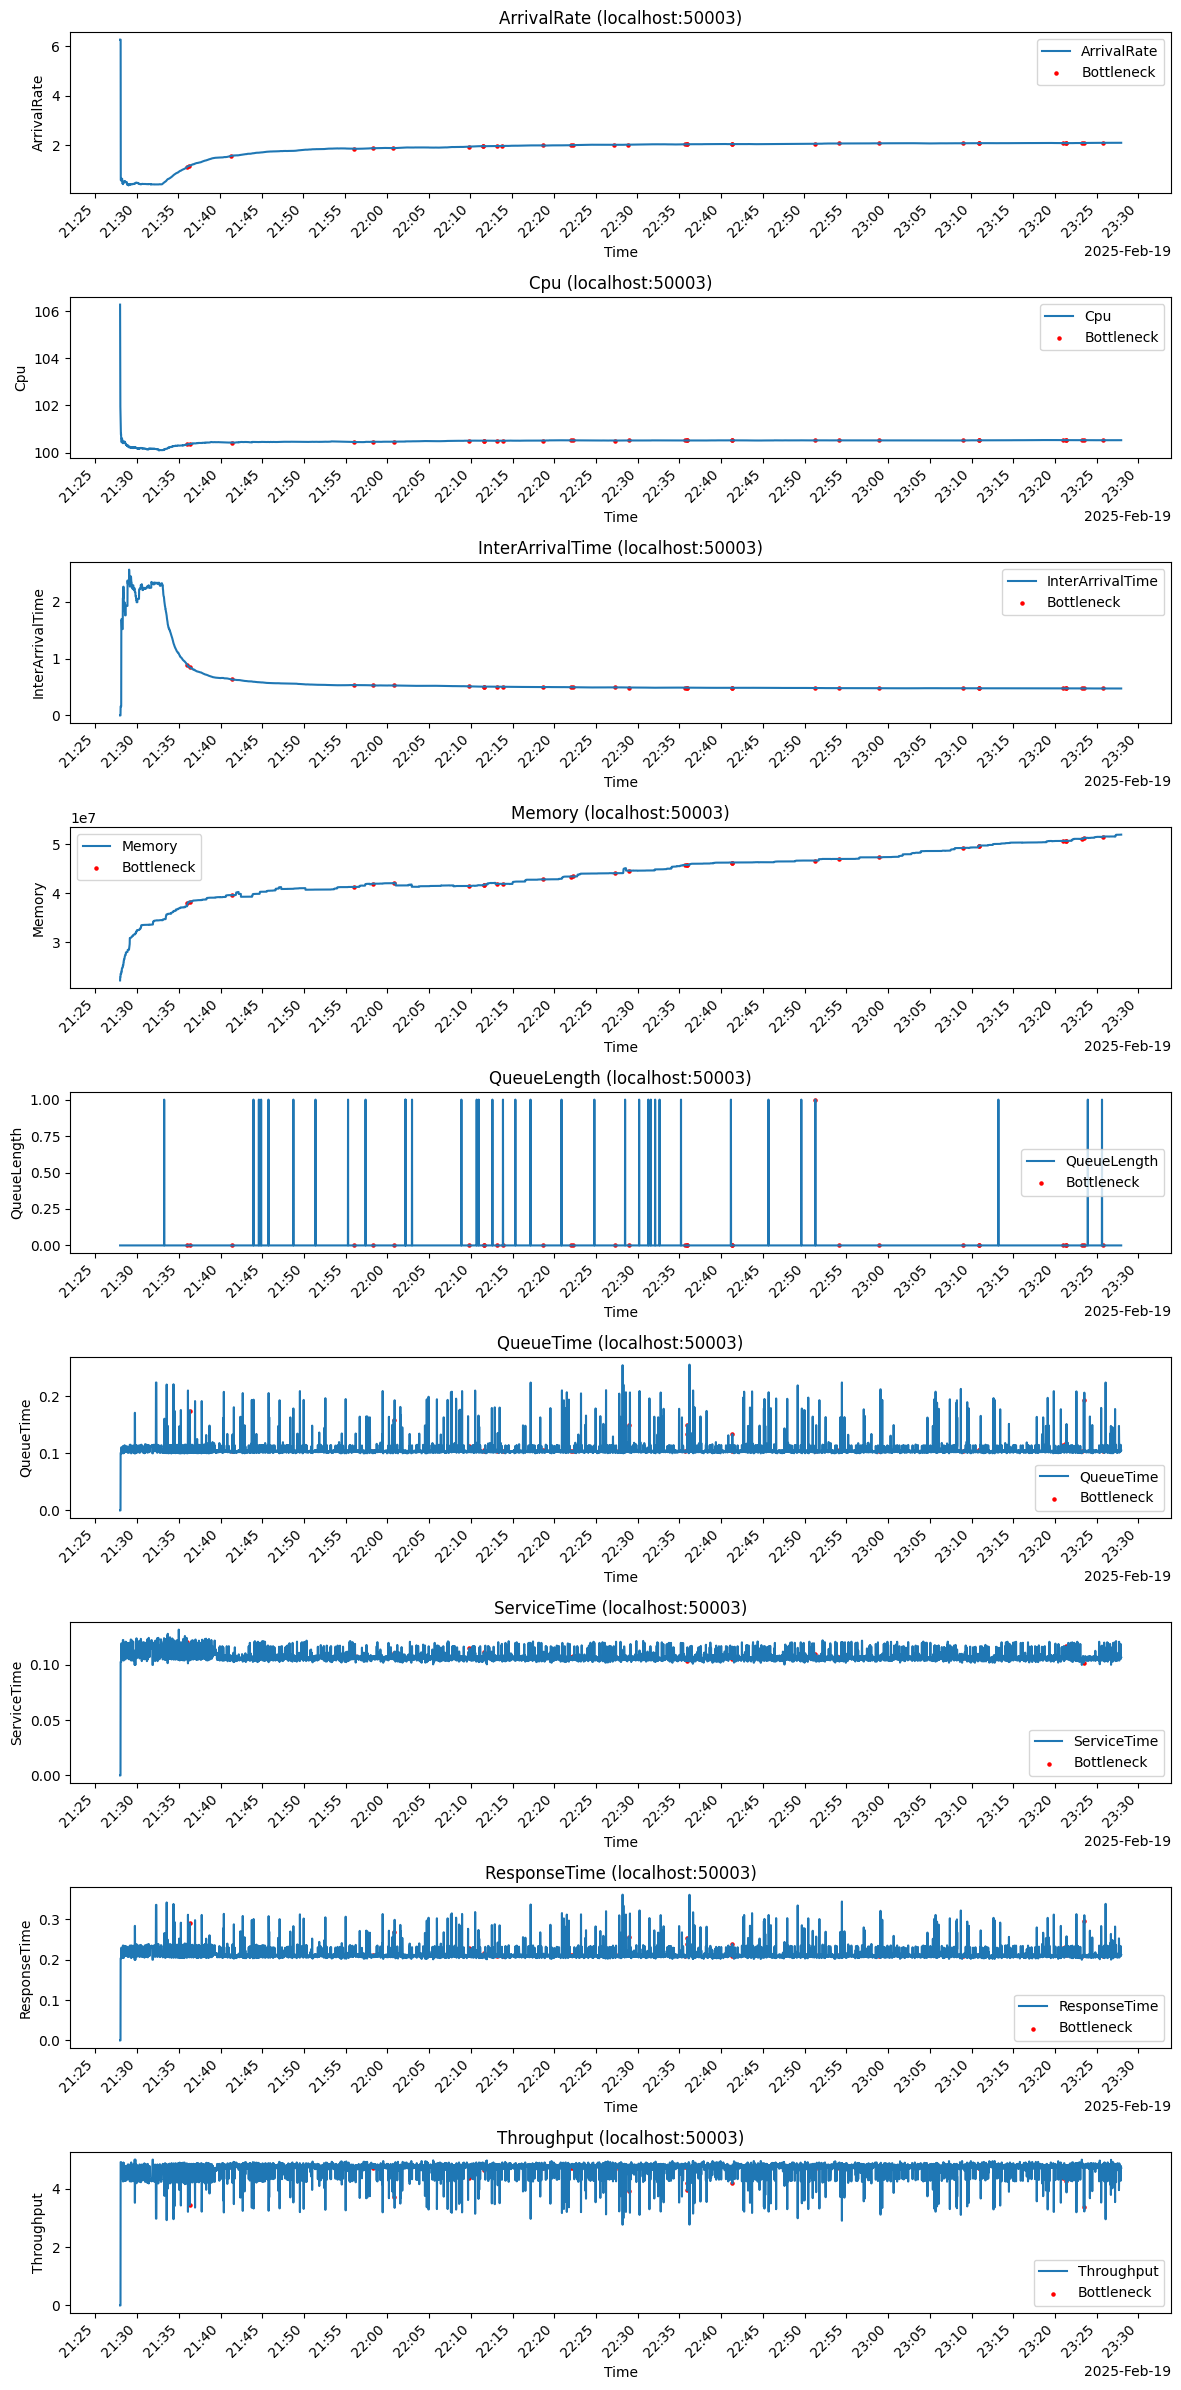

In [382]:
# 'Inter-Arrival Time'의 데이터를 숫자로 변환
df['InterArrivalTime'] = pd.to_numeric(df['InterArrivalTime'], errors='coerce')

# 'Inter-Arrival Time'에서 0을 제외하고 Arrival Rate 계산
df['ArrivalRate'] = df['InterArrivalTime'].apply(lambda x: 1/x if x > 0 else None)

# 시간 데이터가 문자열 형태인 경우, 'yyyy-mm-dd hh:mm:ss' 형식으로 예상되는 파싱
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

# metrics = ['ArrivalRate', 'Cpu', 'InterArrivalTime', 'Memory', 'QueueLength', 'AverageQueueTime', 'AverageServiceTime', 'AverageThroughput', 'QueueTime', 'ServiceTime', 'ResponseTime', 'Throughput']
metrics = ['ArrivalRate', 'Cpu', 'InterArrivalTime', 'Memory', 'QueueLength', 'QueueTime', 'ServiceTime', 'ResponseTime', 'Throughput']

# Plot the sampled data for each metric against time with Bottleneck points highlighted, without lines connecting the points
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 24))

# Define a locator for the x-axis to manage the density of date labels
locator = mdates.SecondLocator(interval=300)  # 300초 간격으로 틱 설정

for i, metric in enumerate(metrics):
    # Plot each metric with time on the x-axis using the sampled data, using line plot instead of scatter
    axes[i].plot(df['time'], df[metric], label=metric)  # smaller dot size for clarity
    # Highlight Bottleneck points in red in the sampled data
    bottleneck_points_sampled = df[df['Bottleneck'] == True]
    if not bottleneck_points_sampled.empty:
        axes[i].scatter(bottleneck_points_sampled['time'], bottleneck_points_sampled[metric], color='red', label='Bottleneck', s=5)
    axes[i].set_title(metric + ' (localhost:' + str(BROKER_PORT) + ')')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(metric)
    axes[i].legend()

    # Set the locator for the x-axis to space date ticks
    axes[i].xaxis.set_major_locator(locator)
    axes[i].xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))

    # Rotate date labels for better readability
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')  # set horizontal alignment to right

plt.tight_layout()
plt.show()


### Arrival Rate vs Performance Metrics

In [383]:
# 데이터 로드
df = pd.read_json(LOG_PATH, lines=True)


In [384]:
# # 'Inter-Arrival Time'의 데이터를 숫자로 변환
# df['InterArrivalTime'] = pd.to_numeric(df['InterArrivalTime'], errors='coerce')

# # 'Inter-Arrival Time'에서 0을 제외하고 Arrival Rate 계산
# df['ArrivalRate'] = df['InterArrivalTime'].apply(lambda x: 1/x if x > 0 else None)

# # 사용할 메트릭 이름 리스트
# metrics = ['Cpu', 'InterArrivalTime', 'Memory', 'QueueLength', 'AverageQueueTime', 'AverageServiceTime', 'AverageThroughput', 'QueueTime', 'ServiceTime', 'ResponseTime', 'Throughput']

# # Arrival Rate를 x축으로 하는 그래프 그리기
# fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 24))

# for i, metric in enumerate(metrics):
#     # Arrival Rate에 대해 각 메트릭을 점으로 표시
#     axes[i].scatter(df['ArrivalRate'], df[metric], label=metric, s=5)
#     # Bottleneck이 참인 포인트를 빨간색으로 표시
#     bottleneck_points_sampled = df[df['Bottleneck'] == True]
#     if not bottleneck_points_sampled.empty:
#         axes[i].scatter(bottleneck_points_sampled['ArrivalRate'], bottleneck_points_sampled[metric], color='red', label='Bottleneck', s=3)
#     axes[i].set_title(metric + ' (localhost:' + str(BROKER_PORT) + ')')
#     axes[i].set_xlabel('ArrivalRate')
#     axes[i].set_ylabel(metric)
#     axes[i].legend()

# plt.tight_layout()
# plt.show()


---

## localhost:50004

### Time vs Performance Metrics

In [385]:
# DIR_NUMBER = 26
BROKER_PORT = 50004
LOG_PATH = "C:\\Users\\SJSJ\\Desktop\\wowsan\\log\\tickLogger\\" +str(DIR_NUMBER) + "\\" + str(BROKER_PORT) + "_tick.json"

In [386]:
# 데이터 로드
df = pd.read_json(LOG_PATH, lines=True)

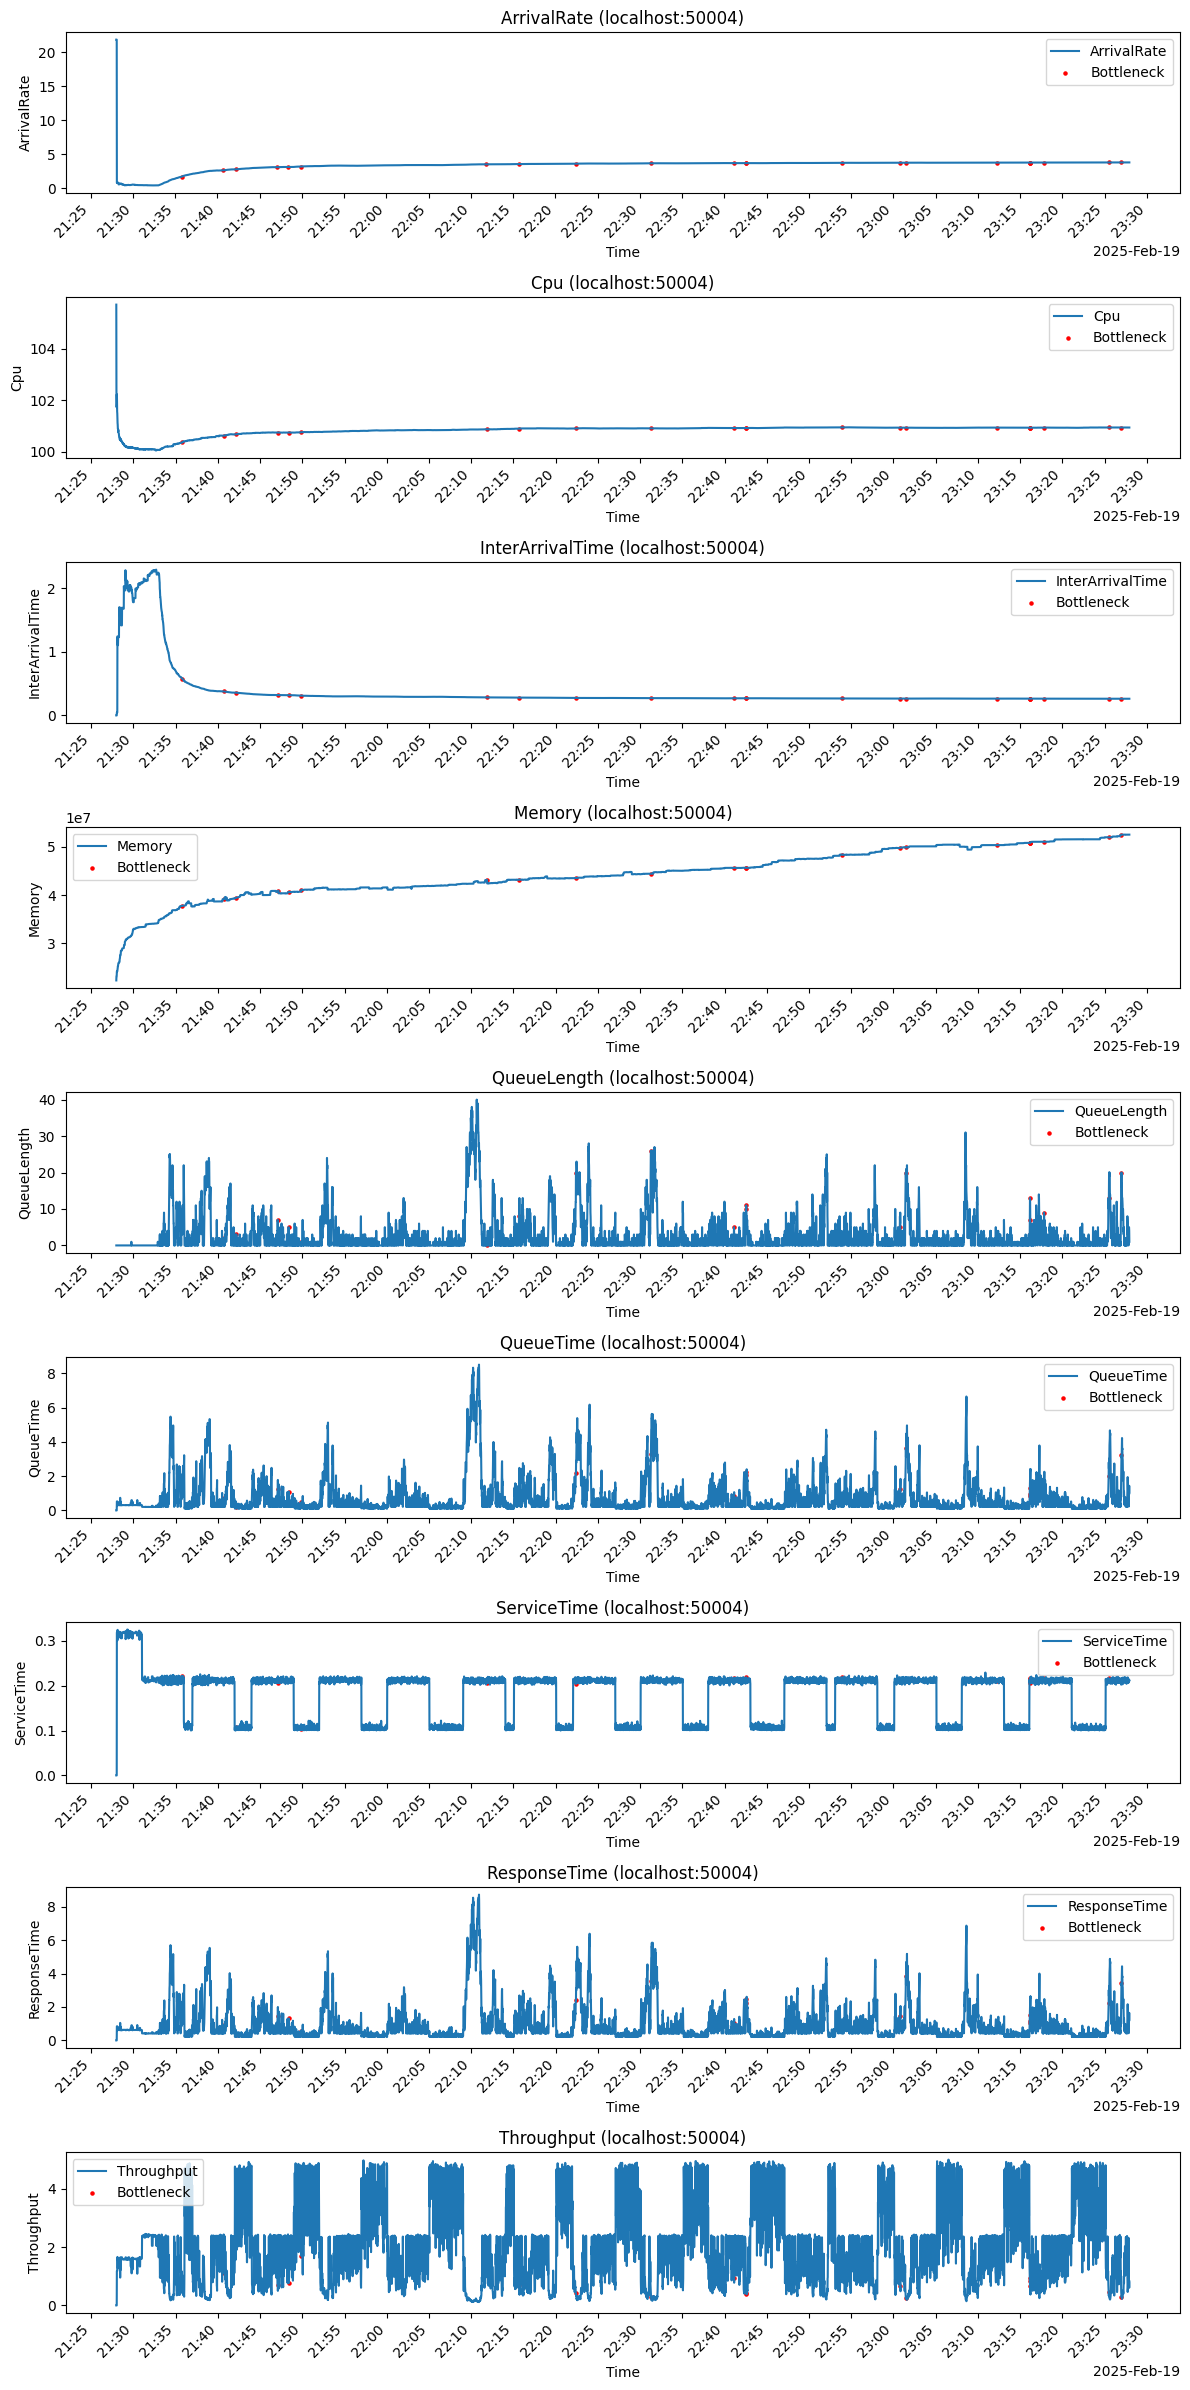

In [387]:
# 'Inter-Arrival Time'의 데이터를 숫자로 변환
df['InterArrivalTime'] = pd.to_numeric(df['InterArrivalTime'], errors='coerce')

# 'Inter-Arrival Time'에서 0을 제외하고 Arrival Rate 계산
df['ArrivalRate'] = df['InterArrivalTime'].apply(lambda x: 1/x if x > 0 else None)

# 시간 데이터가 문자열 형태인 경우, 'yyyy-mm-dd hh:mm:ss' 형식으로 예상되는 파싱
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

# metrics = ['ArrivalRate', 'Cpu', 'InterArrivalTime', 'Memory', 'QueueLength', 'AverageQueueTime', 'AverageServiceTime', 'AverageThroughput', 'QueueTime', 'ServiceTime', 'ResponseTime', 'Throughput']
metrics = ['ArrivalRate', 'Cpu', 'InterArrivalTime', 'Memory', 'QueueLength', 'QueueTime', 'ServiceTime', 'ResponseTime', 'Throughput']

# Plot the sampled data for each metric against time with Bottleneck points highlighted, without lines connecting the points
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 24))

# Define a locator for the x-axis to manage the density of date labels
locator = mdates.SecondLocator(interval=300)  # 300초 간격으로 틱 설정

for i, metric in enumerate(metrics):
    # Plot each metric with time on the x-axis using the sampled data, using line plot instead of scatter
    axes[i].plot(df['time'], df[metric], label=metric)  # smaller dot size for clarity
    # Highlight Bottleneck points in red in the sampled data
    bottleneck_points_sampled = df[df['Bottleneck'] == True]
    if not bottleneck_points_sampled.empty:
        axes[i].scatter(bottleneck_points_sampled['time'], bottleneck_points_sampled[metric], color='red', label='Bottleneck', s=5)
    axes[i].set_title(metric + ' (localhost:' + str(BROKER_PORT) + ')')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(metric)
    axes[i].legend()

    # Set the locator for the x-axis to space date ticks
    axes[i].xaxis.set_major_locator(locator)
    axes[i].xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))

    # Rotate date labels for better readability
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')  # set horizontal alignment to right

plt.tight_layout()
plt.show()


---

## localhost:50005

In [388]:
# DIR_NUMBER = 26
BROKER_PORT = 50005
LOG_PATH = "C:\\Users\\SJSJ\\Desktop\\wowsan\\log\\tickLogger\\" +str(DIR_NUMBER) + "\\" + str(BROKER_PORT) + "_tick.json"

In [389]:
# 데이터 로드
df = pd.read_json(LOG_PATH, lines=True)

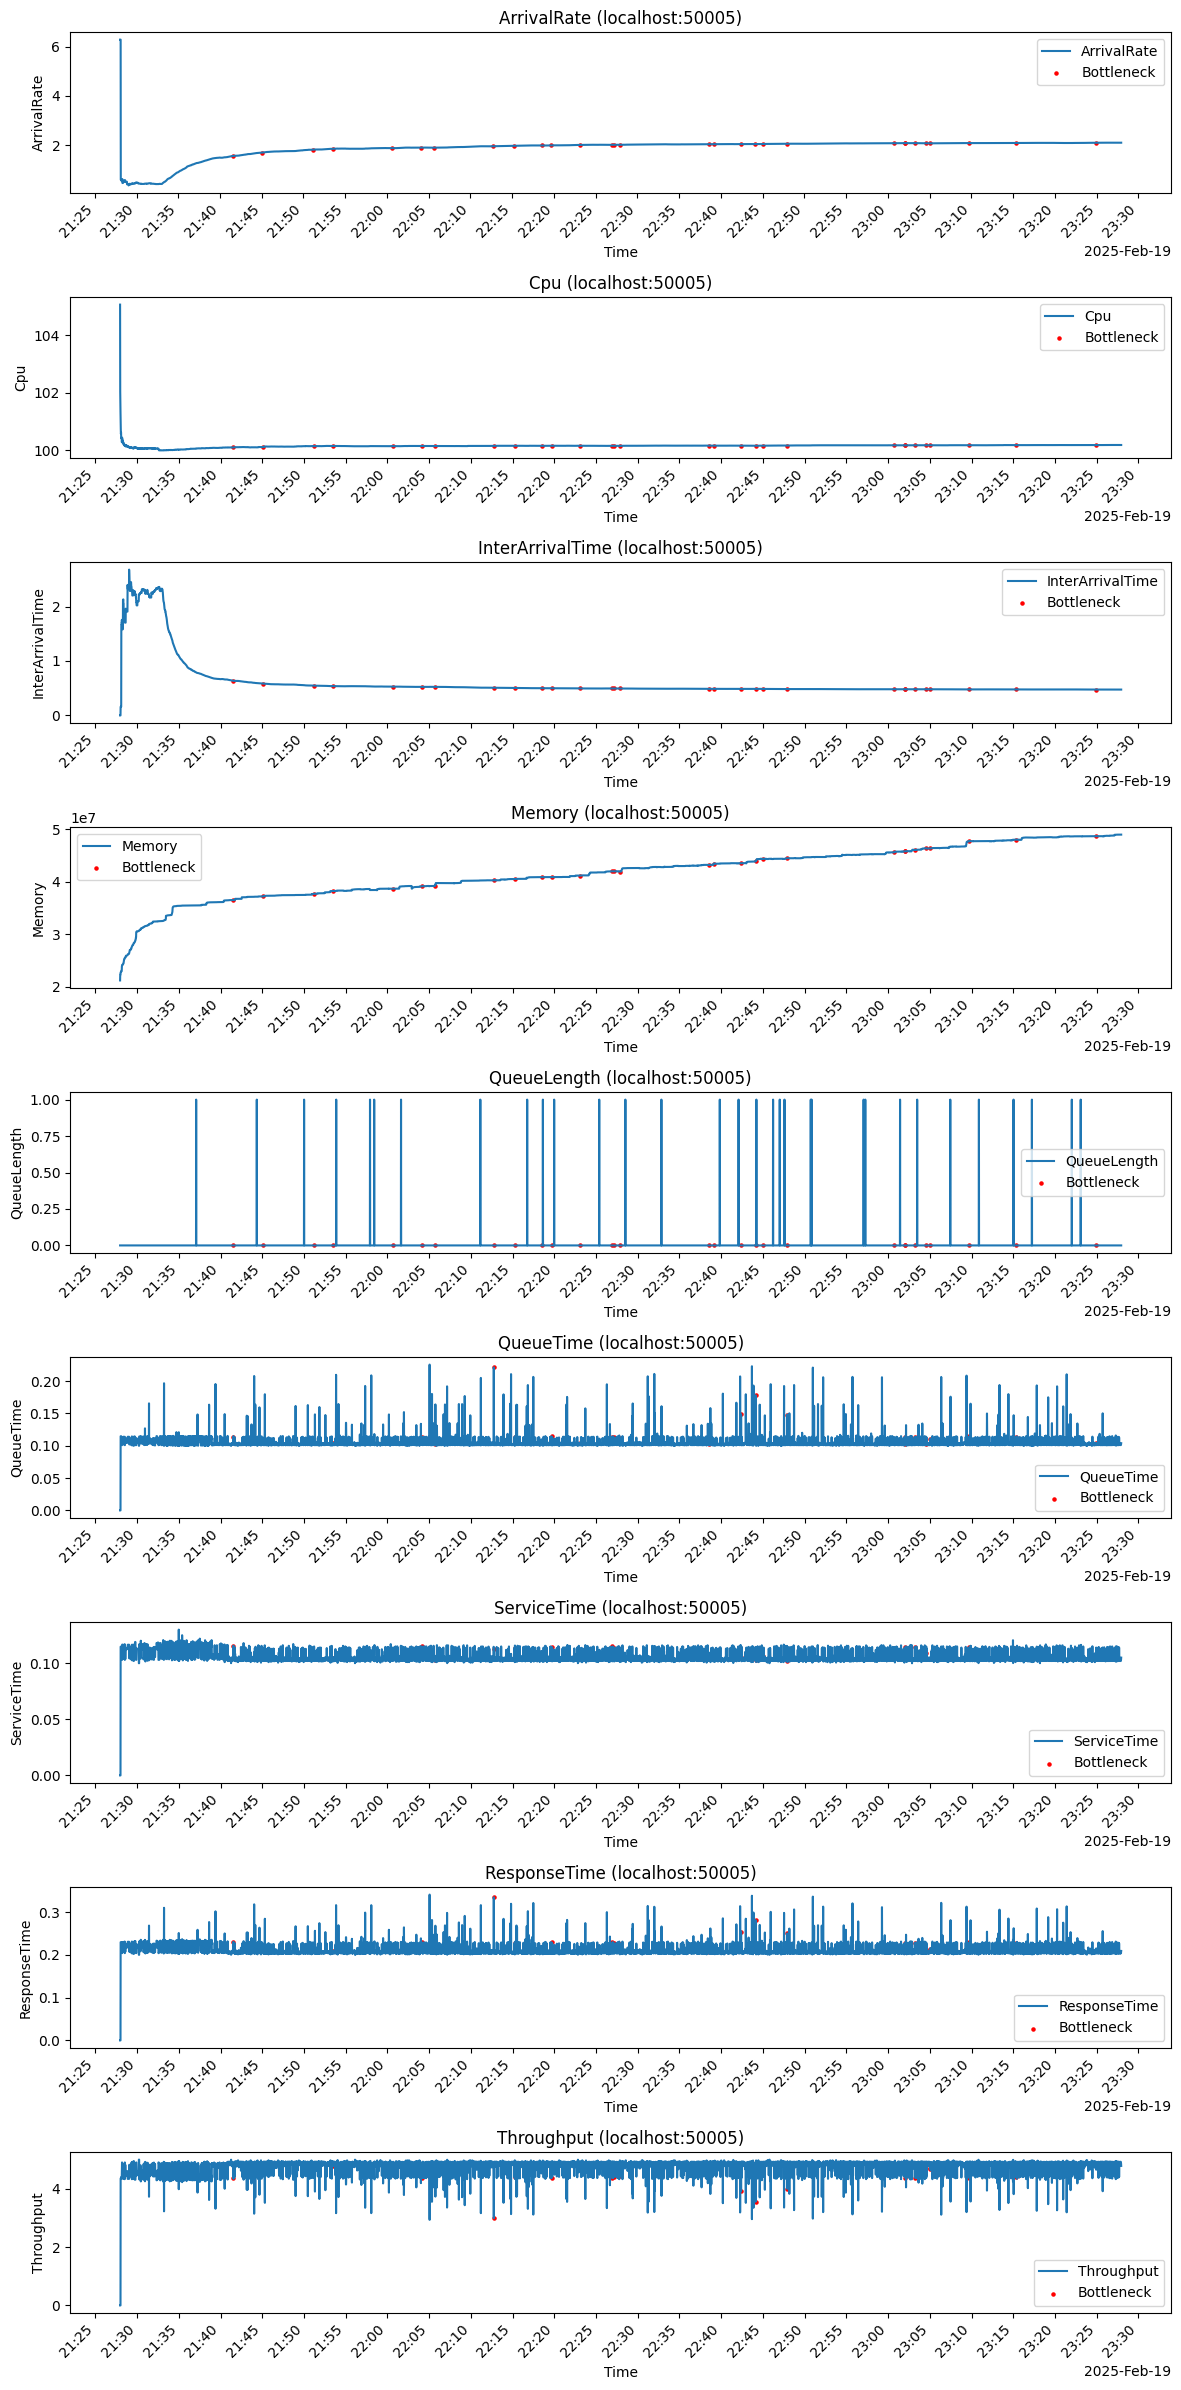

In [390]:
# 'Inter-Arrival Time'의 데이터를 숫자로 변환
df['InterArrivalTime'] = pd.to_numeric(df['InterArrivalTime'], errors='coerce')

# 'Inter-Arrival Time'에서 0을 제외하고 Arrival Rate 계산
df['ArrivalRate'] = df['InterArrivalTime'].apply(lambda x: 1/x if x > 0 else None)

# 시간 데이터가 문자열 형태인 경우, 'yyyy-mm-dd hh:mm:ss' 형식으로 예상되는 파싱
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

# metrics = ['ArrivalRate', 'Cpu', 'InterArrivalTime', 'Memory', 'QueueLength', 'AverageQueueTime', 'AverageServiceTime', 'AverageThroughput', 'QueueTime', 'ServiceTime', 'ResponseTime', 'Throughput']
metrics = ['ArrivalRate', 'Cpu', 'InterArrivalTime', 'Memory', 'QueueLength', 'QueueTime', 'ServiceTime', 'ResponseTime', 'Throughput']

# Plot the sampled data for each metric against time with Bottleneck points highlighted, without lines connecting the points
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 24))

# Define a locator for the x-axis to manage the density of date labels
locator = mdates.SecondLocator(interval=300)  # 300초 간격으로 틱 설정

for i, metric in enumerate(metrics):
    # Plot each metric with time on the x-axis using the sampled data, using line plot instead of scatter
    axes[i].plot(df['time'], df[metric], label=metric)  # smaller dot size for clarity
    # Highlight Bottleneck points in red in the sampled data
    bottleneck_points_sampled = df[df['Bottleneck'] == True]
    if not bottleneck_points_sampled.empty:
        axes[i].scatter(bottleneck_points_sampled['time'], bottleneck_points_sampled[metric], color='red', label='Bottleneck', s=5)
    axes[i].set_title(metric + ' (localhost:' + str(BROKER_PORT) + ')')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(metric)
    axes[i].legend()

    # Set the locator for the x-axis to space date ticks
    axes[i].xaxis.set_major_locator(locator)
    axes[i].xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))

    # Rotate date labels for better readability
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')  # set horizontal alignment to right

plt.tight_layout()
plt.show()


---